In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astroML.plotting import plot_tissot_ellipse
import os
import astropy
from astropy import units as u

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
path = "/media/darkwake/VIB2/Project-IceCube/icecube_10year_ps/events"
filenames = ["IC40_exp.csv", "IC59_exp.csv","IC79_exp.csv", "IC86_I_exp.csv", "IC86_II_exp.csv",
 "IC86_III_exp.csv", "IC86_IV_exp.csv", "IC86_V_exp.csv", "IC86_VI_exp.csv", "IC86_VII_exp.csv"]

In [3]:
file = filenames[0]
f = open(os.path.join(path, file), 'r')

lines = f.readlines()
column=lines[0].split()
column.pop(0)
content = []

In [4]:
for file in filenames:
    f = open(os.path.join(path, file), 'r')
    lines = f.readlines()
    for line in lines[1:]:
        content.append(line.split())
    f.close()

In [5]:
data = pd.DataFrame(content, columns=column)

In [6]:
data

,MJD[days],log10(E/GeV),AngErr[deg],RA[deg],Dec[deg],Azimuth[deg],Zenith[deg]
0,54562.37911273,3.31,0.48,203.024,16.760,218.374,106.712
1,54562.38662244,5.17,0.62,75.024,-13.371,349.100,76.646
2,54562.38789162,3.92,0.56,97.501,11.290,327.060,101.291
3,54562.39267689,5.57,1.13,305.857,-33.932,120.413,56.090
4,54562.40477593,5.80,1.11,143.516,-38.279,287.171,51.684
...,...,...,...,...,...,...,...
1134445,58307.96110988,5.14,0.20,221.246,-59.959,141.239,29.956
1134446,58307.96266638,2.94,1.23,191.547,4.415,171.627,94.312
1134447,58307.96355617,2.88,0.30,308.127,42.543,55.437,132.606
1134448,58307.96397167,2.98,0.21,332.199,44.720,31.489,134.811


In [7]:
# generate a latitude/longitude grid
circ_long = np.linspace(-np.pi, np.pi, 13)[1:-1]
circ_lat = np.linspace(-np.pi / 2, np.pi / 2, 7)[1:-1]
radius = 10 * np.pi / 180.

In [8]:
#fig = plt.figure(figsize=(64,48))
#plt.rcParams.update({'font.size': 48})
#for (i, projection) in enumerate(['Hammer', 'Aitoff', 'Mollweide', 'Lambert']):
#    ax = plt.subplot(221 + i, projection=projection.lower())
#    ax.scatter(data['RA[deg]'][:], data['Dec[deg]'][:],marker='o',color='b', s = 7,alpha=0.5)
#    ax.xaxis.set_major_locator(plt.FixedLocator(np.pi / 3
#                                                * np.linspace(-2, 2, 5)))
#    ax.xaxis.set_minor_locator(plt.FixedLocator(np.pi / 6
#                                                * np.linspace(-5, 5, 11)))
#    ax.yaxis.set_major_locator(plt.FixedLocator(np.pi / 6
#                                                * np.linspace(-2, 2, 5)))
#    ax.yaxis.set_minor_locator(plt.FixedLocator(np.pi / 12
#                                                * np.linspace(-5, 5, 11)))
#    ax.grid(True, which='major', color='r', lw=4)

#    plot_tissot_ellipse(circ_long[:, None], circ_lat, radius, ax=ax, fc='k', alpha=0.3, linewidth=0)
#ax.set_title('%s projection\n\n' % projection)
#plt.show()
#FINAL VERSION Dt 22-05-2022, PLOTS 'Hammer', 'Aitoff', 'Mollweide', 'Lambert'. PLOTS EVENT PROJECTIONS IN SKY COORDINATES


In [9]:
from astropy import units as u
from astropy.coordinates import SkyCoord as scr

r_a = [float(i) for i in data['RA[deg]']]
decl = [float(i) for i in data['Dec[deg]']]
#!!!DONOT USE GENERATORS IN ASTRPY.SKYCOORD THEY ARE NOT SUPPORTED!!!           Dt: 22-05-2022
#!!!SKYCOORD ONLY SUPPORTS NORMAL LISTS NOT EVEN NUMPY.NDARRAYS!!!
radec=scr(ra = r_a * u.degree, dec = decl * u.degree, frame = 'icrs')
print(radec[0])
radec = radec.galactic
print(radec[0])
print(data['RA[deg]'][0])


<SkyCoord (ICRS): (ra, dec) in deg
    (203.024, 16.76)>
<SkyCoord (Galactic): (l, b) in deg
    (347.23813107, 76.00016071)>
203.024


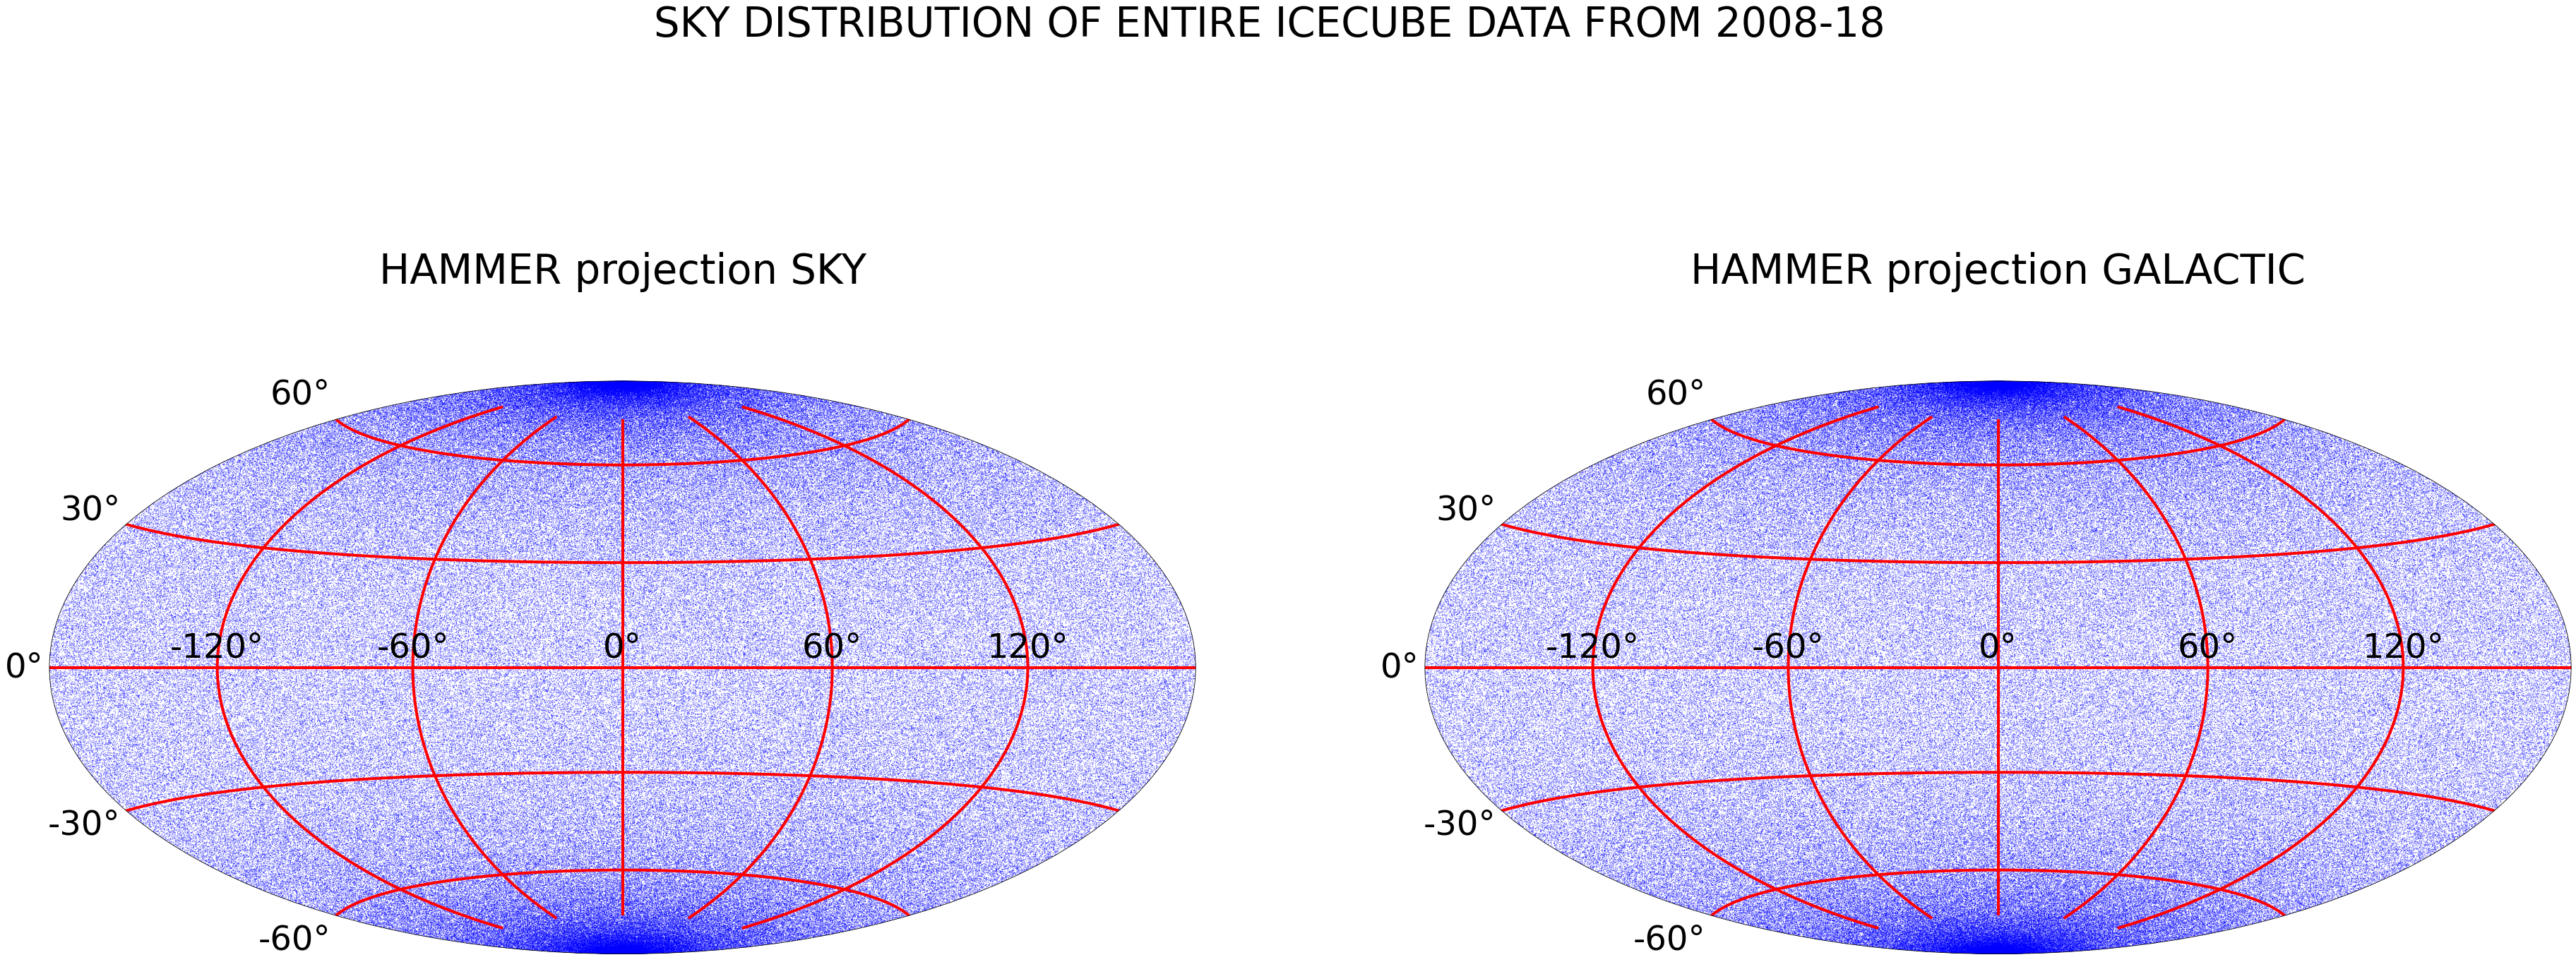

In [10]:
#EDIT 23-05-2022 WITH ASTROPY TO PROJECT IN GALACTIC COORDINATES
#EDIT 25-06-2022 WITH ALL ICECUBE DATA
fig = plt.figure(figsize=(64,48))
plt.rcParams.update({'font.size': 48})

ax1 = plt.subplot(221,projection='hammer')
ax1.scatter(radec.l, data['Dec[deg]'][:],marker='.',color='b', s = 0.5,alpha=0.5)

ax1.xaxis.set_major_locator(plt.FixedLocator(np.pi / 3 * np.linspace(-2, 2, 5)))
ax1.xaxis.set_minor_locator(plt.FixedLocator(np.pi / 6 * np.linspace(-5, 5, 11)))
ax1.yaxis.set_major_locator(plt.FixedLocator(np.pi / 6 * np.linspace(-2, 2, 5)))
ax1.yaxis.set_minor_locator(plt.FixedLocator(np.pi / 12 * np.linspace(-5, 5, 11)))
ax1.grid(True, which='major', color='r', lw=4)

ax2 = plt.subplot(222,projection='hammer')
ax2.scatter(radec.l.degree, radec.b.degree,marker='.',color='b', s = 0.5,alpha=0.5)
ax2.xaxis.set_major_locator(plt.FixedLocator(np.pi / 3 * np.linspace(-2, 2, 5)))
ax2.xaxis.set_minor_locator(plt.FixedLocator(np.pi / 6 * np.linspace(-5, 5, 11)))
ax2.yaxis.set_major_locator(plt.FixedLocator(np.pi / 6 * np.linspace(-2, 2, 5)))
ax2.yaxis.set_minor_locator(plt.FixedLocator(np.pi / 12 * np.linspace(-5, 5, 11)))
ax2.grid(True, which='major', color='r', lw=4)

#    plot_tissot_ellipse(circ_long[:, None], circ_lat, radius, ax=ax, fc='k', alpha=0.3, linewidth=0)
ax1.set_title('HAMMER projection SKY\n\n')
ax2.set_title('HAMMER projection GALACTIC\n\n')
plt.suptitle("SKY DISTRIBUTION OF ENTIRE ICECUBE DATA FROM 2008-18\n")

#plt.show()
plt.savefig('Task-1a/all_IC_40_86vii_from2008-18.png', facecolor='w')
